# $n$-FullAdder no Qiskit

## 1° Parte: Iniciar e Configurar o backend e as credenciais

In [1]:
# Instalando os requisitos
# Não é necessário caso o env já tenha as bibliotecas
%pip install pylatexenc
%pip install qiskit
%pip install qiskit-ibmq-provider
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

  Using cached qiskit_ibmq_provider-0.20.2-py3-none-any.whl.metadata (14 kB)
  Using cached qiskit_terra-0.46.3-cp38-abi3-win_amd64.whl.metadata (13 kB)
  Using cached requests_ntlm-1.1.0-py2.py3-none-any.whl.metadata (938 bytes)
  Using cached numpy-1.23.5.tar.gz (10.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [33 lines of output]
      Traceback (most recent call last):
        File "c:\Users\joseg\anaconda3\envs\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "c:\Users\joseg\anaconda3\envs\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\joseg\anaconda3\envs\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 112, in get_requires_for_build_wheel
          backend = _build_backend()
                    ^^^^^^^^^^^^^^^^
        File "c:\Users\joseg\anaconda3\envs\venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 77, in


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import qiskit
qiskit.__version__

'1.2.4'

In [1]:
# Importando as bibliotecas

from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Parametros da função 'QiskitRuntimeService'
# channel -> especifica qual canal de serviço está sendo utilizado, No caso, 'ibm_quantum' significa que você está se conectando ao IBM Quantum, o serviço de computação quântica em nuvem da IBM.
# token -> seu token de acesso 

token_str = 'ec220acfeee06d8e24e4d517e079fa222d241ea553eb3c34eb4630016a86190ea0bca5182aaae507c8ddf5042b3437ee5b8c3dc7b2feeb8cf0f4f662637ccf28'
service = QiskitRuntimeService(channel='ibm_quantum', # cloud ibm
                               token=token_str)

In [3]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token=token_str,
    set_as_default=True,
    # Use `overwrite=True` if you're updating your token.
    overwrite=True,
)
 
# Load saved credentials
service = QiskitRuntimeService()

In [18]:
# Conectando ao backend

backend = service.backend(name= "ibm_brisbane")

# 2° Parte: Criar, Simular e Executar

### 1. Método Clássico:

![Full Adder](data/full_adder.png)

Um full adder de 4 bits é um circuito lógico que realiza a adição de dois números binários de 4 bits, levando em conta o carry in (vai um) da posição anterior e gerando um carry out para a próxima posição. Ele é composto por quatro full adders simples, cada um somando um par de bits correspondentes dos números de entrada e o carry in gerado pelo bit anterior.

### 2. Método Quântico

#### 2.1. FullAdder mais simples


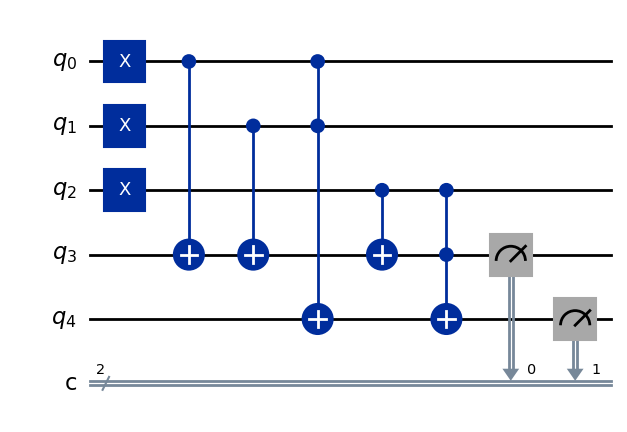

In [25]:
def fulladder(qc, A, B, Cin, Soma, Cout):
    """
    Quantum circuit for a full adder using quantum gates.

    Parameters:
    qc (QuantumCircuit): The quantum circuit to be modified.
    A (int): Index of the first qubit.
    B (int): Index of the second qubit.
    Cin (int): Index of the carry input qubit.
    Soma (int): Index of the qubit to store the sum result.
    Cout (int): Index of the qubit to store the carry out.
    """
    # Primeiro Half Adder: Soma A e B
    qc.cx(A, Soma)   # Soma parcial (XOR entre A e B)
    qc.cx(B, Soma)
    qc.ccx(A, B, Cout)  # Carry gerado pelo AND entre A e B

    # Segundo Half Adder: Soma parcial com Carry In
    qc.cx(Cin, Soma)  # XOR entre a soma parcial (Soma) e o Carry In
    qc.ccx(Cin, Soma, Cout)  # Atualização do Carry Out se Cin e Soma parcial forem ambos 1

# Criação do circuito quântico
qc = QuantumCircuit(5, 2)  # 5 qubits: A, B, Cin, Soma, Cout; 2 bits clássicos para medir Soma e Cout

# Inicializar as entradas (Exemplo: A=1, B=1, carry_in=0)
qc.x(0)  # A = 1
qc.x(1)  # B = 1
qc.x(2)
# carry_in permanece em |0⟩, então não precisamos aplicar nada a Cin (qubit 2)

# Índices dos qubits
A = 0
B = 1
Cin = 2
Soma = 3
Cout = 4

# Aplicar o full adder
fulladder(qc, A, B, Cin, Soma, Cout)

# Medir Soma e carry_out
qc.measure(Soma, 0)  # Medir Soma e armazenar no bit clássico 0
qc.measure(Cout, 1)  # Medir Carry Out e armazenar no bit clássico 1

# Desenhar o circuito
qc.draw(output='mpl')


Resultados da simulação:
{'01': 1024}


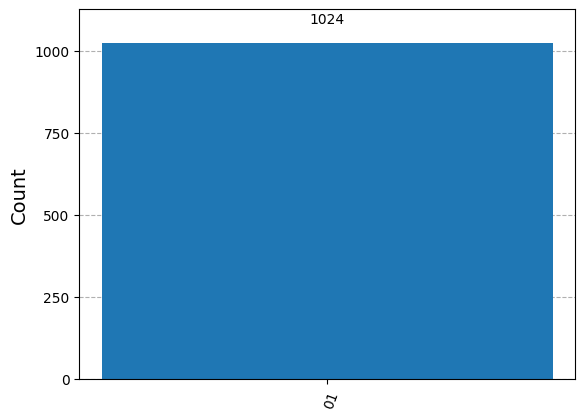

In [26]:
# Seleciona o simulador AerSimulator
simulador = AerSimulator()

# Transpila o Circuito para o backend escolhido (nesse caso o brisbane)
qc_transpilado = transpile(qc, simulador)

# Executa o circuito no simulador com 1024 execuções (shots)
job = simulador.run(qc_transpilado, shots=1024)

# Obtém os resultados
resultado = job.result()

# Obtém a contagem dos resultados
contagens = resultado.get_counts(qc_transpilado)

# Exibe os resultados
print("Resultados da simulação:")
print(contagens)

plot_histogram(contagens)

In [4]:
def halfadder(qc, A, B, carry):
    qc.ccx(A, B, carry)
    qc.cx(A, B)
    qc.measure(B, A)
    qc.measure(carry, B) 
    return qc

def fulladder(qc, A, B, carryin, carryout,  numbits):
    qc = QuantumCircuit(2*numbits,numbits + 1)
    i = 0
    for i in numbits:
        i = i + 1
        qc = halfadder(qc, A+i, B+i, carryin)
qc = QuantumCircuit(1,1)

qc = fulladder(qc, 2, 3, 1, 1, 3)

qc.draw(output='mpl')

TypeError: 'int' object is not iterable